# <center>Decision Tree Exercises</center>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [2]:
import pandas as pd
import acquire, prepare



### What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

<table>
    <tr><th><center>Baseline</center></th></tr>
    <tr><td>

| Pred      | 0     | 1                 |
|:----------|:------|:------------------|
| 1         | 307   | 191               |
| -----     | ----- | -----             |
| Accuracy  | ----- | 38.35341365461847 |
| -----     | ----- | -----             |
| Precision | 0.0   | nan               |
| Recall    | 0.0   | nan               |
| Precision | nan   | 38.35341365461847 |
| Recall    | nan   | 100.0             |

</td>

</tr></table>

In [3]:
from data_evaluation import confusion_table, replace_obj_cols
from IPython.display import Markdown
from sklearn.impute import SimpleImputer


df = acquire.get_titanic_data()
df.drop(columns=['Unnamed: 0'], inplace=True)

clf = DecisionTreeClassifier(max_depth=12, random_state=123, splitter='best')

# Fill ages with the mean age to replace the null ages
imputer = SimpleImputer(strategy='mean')
imputer_obj = SimpleImputer(strategy='most_frequent')

# fit on and transoform the age column in train
df['age'] = imputer.fit_transform(df[['age']])
df['deck'] = imputer_obj.fit_transform(df[['deck']])
df['embark_town'] = imputer_obj.fit_transform(df[['embark_town']])
df['embarked'] = imputer_obj.fit_transform(df[['embarked']])



titanic_df, rk, revk = replace_obj_cols(df)


train, validate, test = acquire.train_validate_test_split(titanic_df, target='survived')

train['baseline'] = 1
ipt_train = train[['survived', 'baseline']]
ipt_validate = validate[['survived']]
ipt_test = test[['survived']]

# print(confusion_table(ipt))
train.drop(columns='baseline', inplace=True)
train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
583,583,0,1,0,36.000000,0,0,40.1250,1,1,4,1,1
165,165,1,3,0,9.000000,0,2,20.5250,0,0,0,0,0
50,50,0,3,0,7.000000,4,1,39.6875,0,0,0,0,0
259,259,1,2,1,50.000000,0,1,26.0000,0,2,0,0,0
306,306,1,1,1,29.699118,0,0,110.8833,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,313,0,3,0,28.000000,0,0,7.8958,0,0,0,0,1
636,636,0,3,0,32.000000,0,0,7.9250,0,0,0,0,1
222,222,0,3,0,51.000000,0,0,8.0500,0,0,0,0,1
485,485,0,3,1,29.699118,3,1,25.4667,0,0,0,0,0


### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

<table>
    <tr><th><center>Y_pred1_max_depth_4</center></th><th><center>Y_pred1_max_depth_3</center></th><th><center>Y_pred1_max_depth_2</center></th></tr>
<tr><td>

| Pred      | 0                 | 1                 |
|:----------|:------------------|:------------------|
| 0         | 113               | 30                |
| 1         | 19                | 52                |
| -----     | -----             | -----             |
| Accuracy  | -----             | 77.10280373831776 |
| -----     | -----             | -----             |
| Precision | 79.02097902097903 | nan               |
| Recall    | 85.60606060606061 | nan               |
| Precision | nan               | 73.23943661971832 |
| Recall    | nan               | 63.41463414634146 |

</td>
<td>

| Pred      | 0                 | 1                 |
|:----------|:------------------|:------------------|
| 0         | 110               | 26                |
| 1         | 22                | 56                |
| -----     | -----             | -----             |
| Accuracy  | -----             | 77.57009345794393 |
| -----     | -----             | -----             |
| Precision | 80.88235294117648 | nan               |
| Recall    | 83.33333333333334 | nan               |
| Precision | nan               | 71.7948717948718  |
| Recall    | nan               | 68.29268292682927 |

</td>
<td>

| Pred      | 0                 | 1                 |
|:----------|:------------------|:------------------|
| 0         | 109               | 28                |
| 1         | 23                | 54                |
| -----     | -----             | -----             |
| Accuracy  | -----             | 76.16822429906543 |
| -----     | -----             | -----             |
| Precision | 79.56204379562044 | nan               |
| Recall    | 82.57575757575758 | nan               |
| Precision | nan               | 70.12987012987013 |
| Recall    | nan               | 65.85365853658537 |

</td>

</tr></table>

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 using a different max_depth value.

* Which model performs better on your in-sample data?
    * In sample data was best performing with max_depth of 12

* Which model performs best on your out-of-sample data, the validate set?
    * The best performing model for that would be a max_depth of 3, in terms of overall accuracy.

Work through these same exercises using the Telco dataset.
Experiment with this model on other datasets with a higher number of output classes.

In [4]:
# Create X & y version of train, validate, test where y is just the
# Series with the target variable and X is all of the features

X_train= train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived



In [5]:
clf = DecisionTreeClassifier(max_depth=4, splitter='best')
clf = clf.fit(X_train, y_train)


In [6]:
import graphviz
from graphviz import Graph


# dot_data= export_graphviz(clf, feature_names=X_train.columns,
#                           class_names=clf.classes_, rounded=True, filled=True,
#                          out_file=None)

# graph = graphviz.Source(dot_data)

y_pred = clf.predict(X_train)
y_pred_proba = clf.predict_proba(X_train)

print(f'Accuracy of Decision Tree classifier on training set: {clf.score(X_validate, y_validate)}')
y_pred1 = clf.predict(X_validate)
ipt_validate['y_pred1_max_depth_4'] = clf.predict(X_validate)
# print(confusion_table(ipt_validate))

Accuracy of Decision Tree classifier on training set: 0.7710280373831776


# <center>Do the same thing with Telco Data</center>


### 

<table>
    <caption><center><h1>Has Churned</h1></center></caption>
    <tr><th><center>Baseline</center></th></tr>
    <tr><td>

| Pred      | False            | True             |
|:----------|:-----------------|:-----------------|
| False     | 2900             | 1047             |
| -----     | -----            | -----            |
| Accuracy  | -----            | 73.4735241955916 |
| -----     | -----            | -----            |
| Precision | 73.4735241955916 | nan              |
| Recall    | 100.0            | nan              |
| Precision | nan              | 0.0              |
| Recall    | nan              | 0.0              |

</td>

</tr></table>


# <center>Model 1</center>
<table>
    <tr><th><center>Y_pred1_max_depth_4</center></th><th><center>Y_pred1_max_depth_3</center></th><th><center>Y_pred1_max_depth_5</center></th></tr>
    <tr><td>

| Pred      | False             | True              |
|:----------|:------------------|:------------------|
| False     | 1105              | 200               |
| True      | 138               | 249               |
| -----     | -----             | -----             |
| Accuracy  | -----             | 80.02364066193853 |
| -----     | -----             | -----             |
| Precision | 84.67432950191571 | nan               |
| Recall    | 88.89782783588093 | nan               |
| Precision | nan               | 64.34108527131784 |
| Recall    | nan               | 55.45657015590201 |

</td>

<td>

| Pred      | False             | True              |
|:----------|:------------------|:------------------|
| False     | 1154              | 256               |
| True      | 89                | 193               |
| -----     | -----             | -----             |
| Accuracy  | -----             | 79.60992907801419 |
| -----     | -----             | -----             |
| Precision | 81.84397163120568 | nan               |
| Recall    | 92.83990345937248 | nan               |
| Precision | nan               | 68.43971631205675 |
| Recall    | nan               | 42.98440979955457 |

</td>

<td>

| Pred      | False             | True              |
|:----------|:------------------|:------------------|
| False     | 1064              | 181               |
| True      | 179               | 268               |
| -----     | -----             | -----             |
| Accuracy  | -----             | 78.72340425531915 |
| -----     | -----             | -----             |
| Precision | 85.46184738955823 | nan               |
| Recall    | 85.59935639581657 | nan               |
| Precision | nan               | 59.95525727069351 |
| Recall    | nan               | 59.68819599109132 |

</td>

</tr></table>

In [7]:
tel_df = pd.read_csv('telco_csv_data.csv')

# Transform data
tel_df.drop(columns=['customer_id', 'start_date', 'churn'], inplace=True)
tel_df.replace({'matches_orig': {'#DIV/0!': pd.notna}}, inplace=True)
tel_df['avg_monthly_charges'] = pd.to_numeric(tel_df.avg_monthly_charges, errors='coerce', downcast='float')


tel_imputer = SimpleImputer(strategy='mean')
tel_imputer_obj = SimpleImputer(strategy='most_frequent')
tel_df['avg_monthly_charges'] = tel_imputer.fit_transform(tel_df[['avg_monthly_charges']])
tel_df['total_charges'] = tel_imputer.fit_transform(tel_df[['total_charges']])
tel_df['matches_orig'] = tel_imputer_obj.fit_transform(tel_df[['matches_orig']])

telco_df, replace_key, revert_key = replace_obj_cols(tel_df)



tel_train, tel_validate, tel_test = acquire.train_validate_test_split(telco_df, target='has_churned')


tel_train['baseline'] = False
ipt_tel_t = tel_train[['has_churned', 'baseline']]
ipt_tel_v = tel_validate[['has_churned']]
ipt_tel_test= tel_test[['has_churned']]

# print(confusion_table(ipt_tel_t))
tel_train.drop(columns='baseline', inplace=True)

clf_tel = DecisionTreeClassifier(max_depth=24, splitter='best')



In [8]:
# Create X & y version of train, validate, test where y is just the
# Series with the target variable and X is all of the features

X_tel_train= tel_train.drop(columns=['has_churned'])
y_tel_train = tel_train['has_churned']



X_tel_validate = tel_validate.drop(columns=['has_churned'])
y_tel_validate = tel_validate['has_churned']

X_tel_test = tel_test.drop(columns=['has_churned'])
y_tel_test = tel_test['has_churned']




# print(X_tel_train.shape, X_tel_validate.shape, X_tel_test.shape)

clf_tel = DecisionTreeClassifier(max_depth=5, splitter='best')
clf_tel = clf_tel.fit(X_tel_train, y_tel_train)


y_pred_tel = clf_tel.predict(X_tel_train)
y_pred_proba_tel = clf_tel.predict_proba(X_tel_train)


print(f'Accuracy of Decision Tree classifier on training set: {clf_tel.score(X_tel_validate, y_tel_validate)}')

y_pred1_tel = clf_tel.predict(X_tel_validate)
ipt_tel_v['y_pred1_max_depth_5'] = clf_tel.predict(X_tel_validate)
Markdown(confusion_table(ipt_tel_v))


Accuracy of Decision Tree classifier on training set: 0.7872340425531915


<div><center><h3>has_churned</h3>
    <table>
    <tr><th><center>Y_pred1_max_depth_5</center></th></tr>
    <tr><td>

| Prediction   | False             | True              |
|:-------------|:------------------|:------------------|
| False        | 1064              | 181               |
| True         | 179               | 268               |
| -----        | -----             | -----             |
| Accuracy     | -----             | 78.72340425531915 |
| -----        | -----             | -----             |
| Precision    | 85.46184738955823 | nan               |
| Recall       | 85.59935639581657 | nan               |
| f1-score     | 85.53054662379421 | nan               |
| support      | 1243.0            | nan               |
| Precision    | nan               | 59.95525727069351 |
| Recall       | nan               | 59.68819599109132 |
| f1-score     | nan               | 59.82142857142857 |
| support      | nan               | 449.0             |

</td>

</tr></table></center></div>

<center><h1>Random Forest Exercises</h1></center>





<center><h3>Titanic Dataset feature importance</h3></center>

|                    |      sex |     fare |       age |    class |   pclass |      deck |   passenger_id |     sibsp |   embarked |   embark_town |     alone |     parch |
|:-------------------|---------:|---------:|----------:|---------:|---------:|----------:|---------------:|----------:|-----------:|--------------:|----------:|----------:|
| feature_importance | 0.415097 | 0.115833 | 0.0742075 | 0.073721 | 0.071738 | 0.0710371 |      0.0686954 | 0.0326924 |  0.0208691 |     0.0194997 | 0.0185427 | 0.0180671 |



<center><h3>Titanic Dataset max depth accuracy for validate dataset</h3></center>


|          |        5 |        3 |        2 |        4 |        7 |        8 |        6 |        9 |       12 |       10 |        1 |       11 |
|:---------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| accuracy | 0.799065 | 0.794393 | 0.780374 | 0.780374 | 0.780374 | 0.780374 | 0.775701 | 0.775701 | 0.775701 | 0.766355 | 0.761682 | 0.757009 |

In [9]:
from sklearn.ensemble import RandomForestClassifier


# Make the model
rf = RandomForestClassifier(criterion='gini', min_samples_leaf=3,
                            max_depth=5, n_estimators=329)

# Fit the model
rf.fit(X_train, y_train)

# list feature importance and sort from highest importance to lowest
features = pd.DataFrame(rf.feature_importances_, index=[col for col in X_train.columns]).sort_values(by=0, ascending=False)
features.rename(columns={0: 'feature_importance'}, inplace=True)
# Ma(features.T.to_markdown())




In [10]:
# y_pred = rf.predict(X_train)
# y_pred_proba = rf.predict_proba(X_train)

max_depth_df = pd.DataFrame()
max_depth = X_train.shape[1]

####################################### Check each depth for the most accurate ###################################
# for depth in range(1, max_depth+1):
#     # Make the model
#     rf = RandomForestClassifier(criterion='gini', min_samples_leaf=3,
#                                 max_depth=depth, n_estimators=329)

#     # Fit the model
#     rf.fit(X_train, y_train)
#     # Print Accuracy
#     df2 = [{'depth': f'{depth}', 'accuracy' : rf.score(X_validate, y_validate)}]
#     max_depth_df = max_depth_df.append(df2, ignore_index=True)

# # Find the most accurate depth for the validate data and format the data so it's easiest to read
# result = max_depth_df.sort_values(by='accuracy', ascending=False).set_index('depth').T
# print(result.to_markdown())
####################################### Check each depth for the most accurate ###################################


<center><h2>The below validation curve will assist in choosing the best n_estimators<h2></center>
    
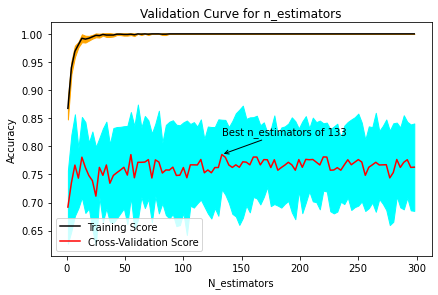

In [ ]:
import numpy as np
from data_evaluation import explore_validation_curve

val = explore_validation_curve(X_validate, y_validate, 'max_depth', np.arange(1, 13, 1),
                                RandomForestClassifier(min_samples_split=6, min_samples_leaf=2))


In [ ]:
# Make the model with the best hyperparamaters
rf = RandomForestClassifier(criterion='gini', min_samples_leaf=3,
                                max_depth=4, n_estimators=329)
# Fit the model 
rf.fit(X_train, y_train)
rf.score(X_test, y_test)